In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_biclusters

In [35]:
X, y = make_biclusters(n_clusters = 2, shape = (10, 1))

ValueError: too many values to unpack (expected 2)

In [6]:
X, y

(array([[ 1.86916236e+00,  5.47316387e-03],
        [ 7.19918646e-01, -4.59976268e-01],
        [ 1.89300260e+00,  4.99485036e-02],
        [ 1.19573174e-01,  9.92825391e-01],
        [ 4.93341223e-02,  1.89783319e-01],
        [ 1.70727326e-01, -5.88441929e-02],
        [ 9.88560586e-01,  1.50824297e-01],
        [ 1.63742669e-01, -4.83371925e-02],
        [-9.71404512e-01,  2.37430566e-01],
        [ 9.94910416e-01,  1.00763407e-01],
        [ 8.43108870e-01,  5.37742906e-01],
        [ 8.81363066e-01,  4.72439568e-01],
        [ 9.58190308e-01,  2.86131674e-01],
        [ 7.07829394e-01, -4.56366215e-01],
        [ 5.08958403e-03,  3.99236593e-01],
        [ 1.36366262e+00, -4.31530729e-01],
        [ 4.05092699e-01, -3.03794316e-01],
        [ 0.00000000e+00,  5.00000000e-01],
        [ 9.81075873e-01, -4.99820923e-01],
        [-9.68331653e-01,  2.49667397e-01],
        [-8.14908476e-01,  5.79589661e-01],
        [ 3.17847865e-01, -2.31210274e-01],
        [ 3.65301986e-01, -2.727

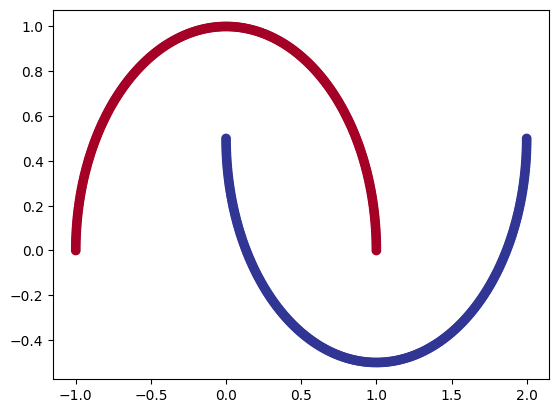

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [22]:
# let's build model

tf.random.set_seed(42)

#               1. Create Model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])



#               2. Compile Model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])



#               3. Fit Model

history_1 = model_1.fit(X, y, epochs = 100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6970 - loss: 0.6326
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.3578 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.2505 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8933 - loss: 0.2189
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9064 - loss: 0.1931 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9153 - loss: 0.1677 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9262 - loss: 0.1325 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1007 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.0708 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0443 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0265 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [23]:
def plot_decision_boundary(model, X, y):

    """
        Plots the decision boundary created by a model predicting on X
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    

    # Create X values (we're going to make the predictions on these)

    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together


    # Make predictions

    y_pred = model.predict(x_in)


    # Check for multi-class 

    if len(y_pred[0]) > 1:

        print("Doing Multi-Class Classification")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:

        print("Doing Binary Classification")
        y_pred = np.round(y_pred).reshape(xx.shape)


    # Plot the decision boundary

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


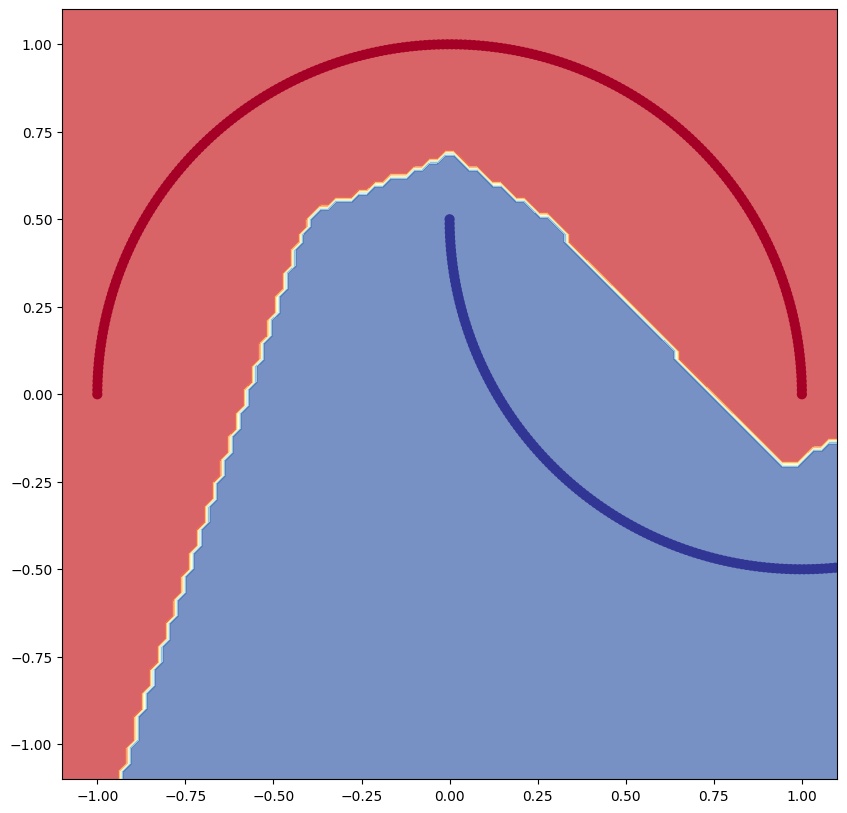

In [25]:
plt.figure(figsize = (10, 10))
plot_decision_boundary(model = model_1,
                       X = X,
                       y= y)